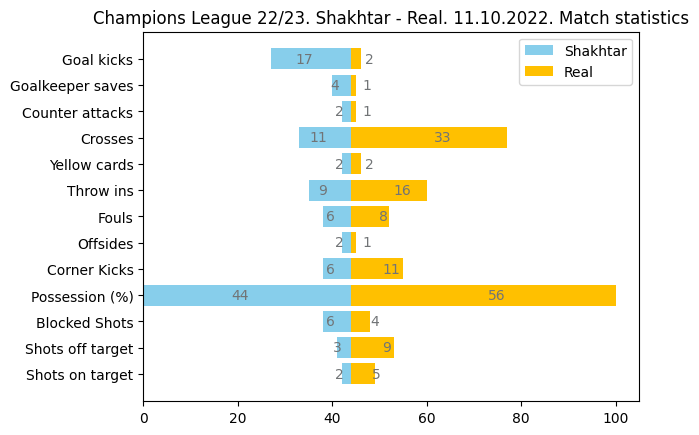

In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

# Part1 - Scraping. Scraping real data from the site https://www.livescore.com. 
# Statistic's summary of the match such like Kicks, Possession, Corners etc. 
# Match - Champions League 22/23. Shakhtar - Real. 11.10.2022. 
# Using BeautifulSoup4 and requests libraries

url = "https://www.livescore.com/en/football/champions-league-2022-2023/group-f-2022-2023/shakhtar-donetsk-vs-real-madrid/798201/stats/"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

# Variable stat_tags gathers list of HTML tags which have info about the match.
stat_tags = soup.find_all(attrs={'data-testid': 'match-detail_statistic_header'})

# Three list variables which get data from the HTML: 1) value of the statistic property for home team;
# 2) name of the statistic property; 3) value of the statistic property for away team;
stat_home_arr = []
stat_name_arr = []
stat_away_arr = []

# Attaching properties to the lists
for stat in stat_tags:
  stat_home_arr.append(int(stat.find(attrs={'data-testid': 'match-detail_statistic_home-stat'}).get_text()))
  stat_name_arr.append(stat.find(attrs={'data-testid': 'match-detail_statistic_stat-name'}).get_text())
  stat_away_arr.append(int(stat.find(attrs={'data-testid': 'match-detail_statistic_away-stat'}).get_text()))  

# Part2 - visualisation. Using matplot library. Horizontal bars
  
# Additional int list which helps to shift horizontal bars to the center
home_padding_arr = []

# Attaching properies to the list
for index, arr in enumerate(stat_home_arr):
  home_padding_arr.append(max(stat_home_arr) - arr)

# Attaching all properties to the horizontal bar
plt.title('Champions League 22/23. Shakhtar - Real. 11.10.2022. Match statistics')
p1 = plt.barh(stat_name_arr, stat_home_arr, left=home_padding_arr, color='#87CEEB', label='Shakhtar')
p2 = plt.barh(stat_name_arr, stat_away_arr, left=max(stat_home_arr), color='#FFC000', label='Real')
plt.bar_label(p1, label_type='center', padding=-5, color='#717476')
plt.bar_label(p2, label_type='center', padding=10, color='#717476')
plt.legend()
plt.show()